## Import Required Modules

In [ ]:
import os
import shutil

## 1. Downloading Dataset from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download tourist55/alzheimers-dataset-4-class-of-images

Dataset URL: https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images
License(s): ODbL-1.0
 26% 9.00M/34.1M [00:00<00:00, 83.0MB/s]
100% 34.1M/34.1M [00:00<00:00, 176MB/s] 


In [ ]:
!unzip alzheimers-dataset-4-class-of-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

## 2. Fixing Folder Structure

In [ ]:
def merge_subfolders(data_folder):
    #data_folder = 'Alzheimer_s Dataset/train'
    subfolders = ['MildDemented', 'ModerateDemented', 'VeryMildDemented']
    destination_folder = 'AllDemented'

    destination_path = os.path.join(data_folder, destination_folder)
    os.makedirs(destination_path, exist_ok=True)

    for subfolder in subfolders:
        subfolder_path = os.path.join(data_folder, subfolder)

        for filename in os.listdir(subfolder_path):
            #new file names subfolder_originalname
            new_filename = f"{subfolder}_{filename}"

            src = os.path.join(subfolder_path, filename)
            dst = os.path.join(destination_path, new_filename)

            shutil.copy(src, dst)

    print("Done")
    return

In [ ]:
#paths for dataset
alzheimer_train = "Alzheimer_s Dataset/train"
alzheimer_test = "Alzheimer_s Dataset/test"

merge_subfolders(alzheimer_train)
merge_subfolders(alzheimer_test)

Done
Done


In [ ]:
def delete_other_folders(directory, keep_folders):
    """
    Delete all folders in the specified directory except the ones listed in keep_folders.

    Parameters:
    - directory: str, the path to the main directory.
    - keep_folders: list of str, the names of the folders to keep.
    """
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path) and folder_name not in keep_folders:
            print(f"Deleting folder: {folder_path}")
            shutil.rmtree(folder_path)
    return

In [ ]:
# Define the folders to keep
keep_folders = ['AllDemented', 'NonDemented']

# Delete other folders in the train and test directories
delete_other_folders(alzheimer_train, keep_folders)
delete_other_folders(alzheimer_test, keep_folders)

print("Completed deletion of other folders.")

Deleting folder: Alzheimer_s Dataset/train/MildDemented
Deleting folder: Alzheimer_s Dataset/train/ModerateDemented
Deleting folder: Alzheimer_s Dataset/train/VeryMildDemented
Deleting folder: Alzheimer_s Dataset/test/MildDemented
Deleting folder: Alzheimer_s Dataset/test/ModerateDemented
Deleting folder: Alzheimer_s Dataset/test/VeryMildDemented
Completed deletion of other folders.


## 3. Preprocessing and Base Model

### 3.1 Data Preparation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for normalization only (no data augmentation)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images from the directories
train_generator = train_datagen.flow_from_directory(alzheimer_train,
                                                    target_size=(176, 208),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(alzheimer_test,
                                                  target_size=(176, 208),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 5121 images belonging to 2 classes.
Found 1279 images belonging to 2 classes.


### 3.2 Build the Model

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(176, 208, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

### 3.3 Compile the Model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

### 3.4 Train the Model

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=30)

Epoch 1/10
100/100 [==============================] - 323s 3s/step - loss: 0.5641 - accuracy: 0.7157 - val_loss: 0.7089 - val_accuracy: 0.5302
Epoch 2/10
100/100 [==============================] - 294s 3s/step - loss: 0.5414 - accuracy: 0.7346 - val_loss: 0.6162 - val_accuracy: 0.6635
Epoch 3/10
100/100 [==============================] - 321s 3s/step - loss: 0.5293 - accuracy: 0.7347 - val_loss: 0.6009 - val_accuracy: 0.6625
Epoch 4/10
100/100 [==============================] - 313s 3s/step - loss: 0.4800 - accuracy: 0.7712 - val_loss: 0.6106 - val_accuracy: 0.6552
Epoch 5/10
100/100 [==============================] - 321s 3s/step - loss: 0.4469 - accuracy: 0.7800 - val_loss: 0.5806 - val_accuracy: 0.6927
Epoch 6/10
100/100 [==============================] - 300s 3s/step - loss: 0.4065 - accuracy: 0.8144 - val_loss: 0.6637 - val_accuracy: 0.6135
Epoch 7/10
100/100 [==============================] - 323s 3s/step - loss: 0.3695 - accuracy: 0.8309 - val_loss: 0.6561 - val_accuracy: 0.6396

### 3.5 Evaluate the Model

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

40/40 [==============================] - 35s 865ms/step - loss: 0.6856 - accuracy: 0.6489
Test loss: 0.6856352686882019
Test accuracy: 0.6489444971084595


In [ ]:
# Evaluate the model on the train dataset
train_loss, train_acc = model.evaluate(train_generator, steps=len(train_generator))
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)

50/50 [==============================] - 49s 987ms/step - loss: 0.2264 - accuracy: 0.9112
Train loss: 0.22642788290977478
Train accuracy: 0.9112499952316284


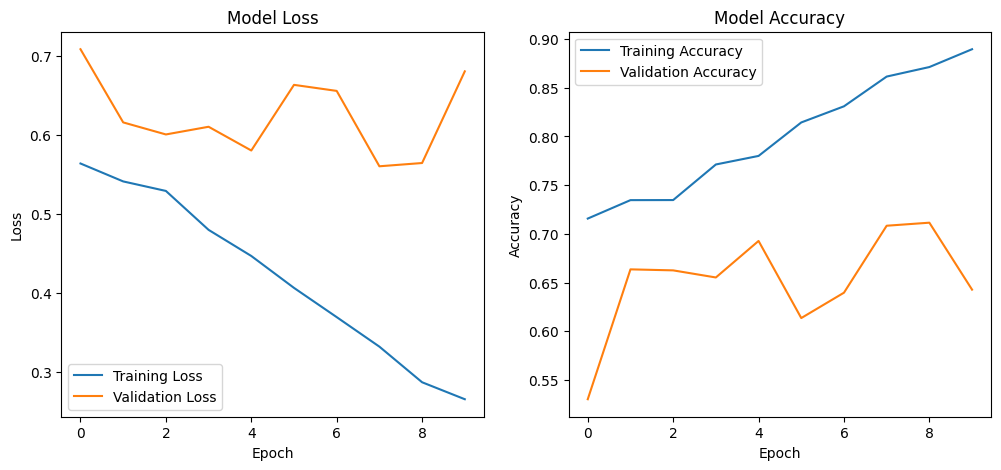

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()